In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\dimri\OneDrive\Desktop\vs code java\myfirstvscode\logistic regression\robosheet2.csv')

In [3]:
df = df.drop(['Evaporation', 'Sunshine','Cloud9am','Cloud3pm','Location','Date'], axis = 1)
#we drop all these columns 
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [4]:
df = df.dropna(axis =0)
df.shape

(112925, 17)

In [5]:
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for col in categorical_columns:
    df[col] = pd.factorize(df[col])[0]

In [6]:
df.head()


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [7]:
df.shape

(112925, 17)

In [8]:
from sklearn.model_selection import train_test_split  
X = df.drop(columns=['RainTomorrow']).copy()
Y = df['RainTomorrow'].copy()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [9]:
Y_train

116168    0
40060     1
72980     1
28566     0
83089     0
         ..
71544     0
66031     0
105059    0
71063     0
19274     0
Name: RainTomorrow, Length: 90340, dtype: int64

In [10]:
X_train

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
116168,2.9,19.5,1.6,8,24.0,4,11,9.0,9.0,87.0,47.0,1020.5,1018.6,10.4,18.1,1
40060,8.2,17.2,7.6,15,43.0,14,9,19.0,26.0,69.0,79.0,1023.5,1022.5,12.8,14.3,1
72980,14.5,26.8,2.2,11,78.0,1,12,11.0,28.0,82.0,42.0,1015.7,1010.9,18.4,26.3,1
28566,18.3,38.8,0.0,11,63.0,1,12,2.0,9.0,76.0,33.0,1013.2,1009.2,24.0,37.1,0
83089,9.3,27.9,0.0,15,35.0,9,10,7.0,17.0,67.0,42.0,1013.4,1012.9,20.1,26.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71544,11.7,26.3,0.0,6,20.0,3,3,9.0,9.0,71.0,30.0,1023.0,1020.7,15.0,25.5,0
66031,8.1,20.3,0.0,10,56.0,5,13,22.0,26.0,74.0,46.0,1023.8,1021.7,14.9,19.0,0
105059,15.7,35.2,0.0,12,39.0,12,4,17.0,7.0,100.0,19.0,1019.5,1015.9,21.0,33.2,0
71063,7.1,20.0,0.0,2,31.0,10,10,6.0,17.0,66.0,53.0,1021.7,1020.6,13.5,17.8,0


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [12]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [13]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

a treee that dosent have a stopping criteria would look smth like this 

In [14]:
clf.predict_proba(X_test)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.7845029887093203

In [16]:
from sklearn.metrics import precision_score
precision_score(Y_test, predictions)

0.5067950169875425

In [17]:
from sklearn.metrics import recall_score
recall_score(Y_test, predictions)

0.5436323142336505

In [18]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions, target_names=['NoRainTomorrow', 'RainTomorrow']))

                precision    recall  f1-score   support

NoRainTomorrow       0.87      0.85      0.86     17646
  RainTomorrow       0.51      0.54      0.52      4939

      accuracy                           0.78     22585
     macro avg       0.69      0.70      0.69     22585
  weighted avg       0.79      0.78      0.79     22585



In [19]:
feature_names = X.columns
feature_names

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [20]:
clf.feature_importances_

array([0.053272  , 0.04429372, 0.0434328 , 0.03453163, 0.0797491 ,
       0.03603603, 0.03569744, 0.04187144, 0.04044254, 0.05183022,
       0.30455214, 0.05694935, 0.07921085, 0.04644798, 0.04936917,
       0.00231357])

In [21]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
Humidity3pm,0.304552
WindGustSpeed,0.079749
Pressure3pm,0.079211
Pressure9am,0.056949
MinTemp,0.053272
Humidity9am,0.051830
Temp3pm,0.049369
Temp9am,0.046448
MaxTemp,0.044294
Rainfall,0.043433


In [22]:
features = list(feature_importance[feature_importance[0]>0].index)
features


['Humidity3pm',
 'WindGustSpeed',
 'Pressure3pm',
 'Pressure9am',
 'MinTemp',
 'Humidity9am',
 'Temp3pm',
 'Temp9am',
 'MaxTemp',
 'Rainfall',
 'WindSpeed9am',
 'WindSpeed3pm',
 'WindDir9am',
 'WindDir3pm',
 'WindGustDir',
 'RainToday']

<Axes: >

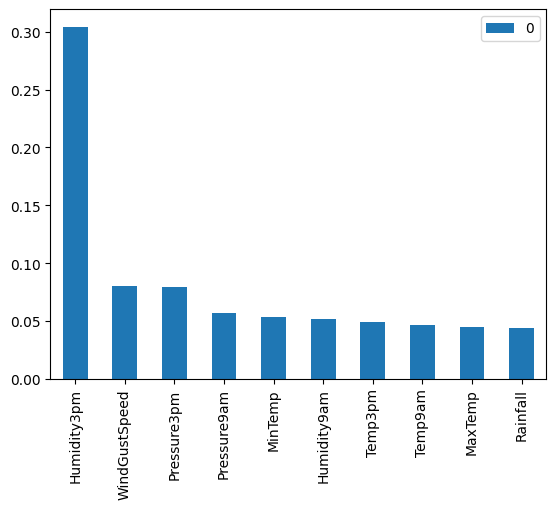

In [23]:
feature_importance.head(10).plot(kind='bar')

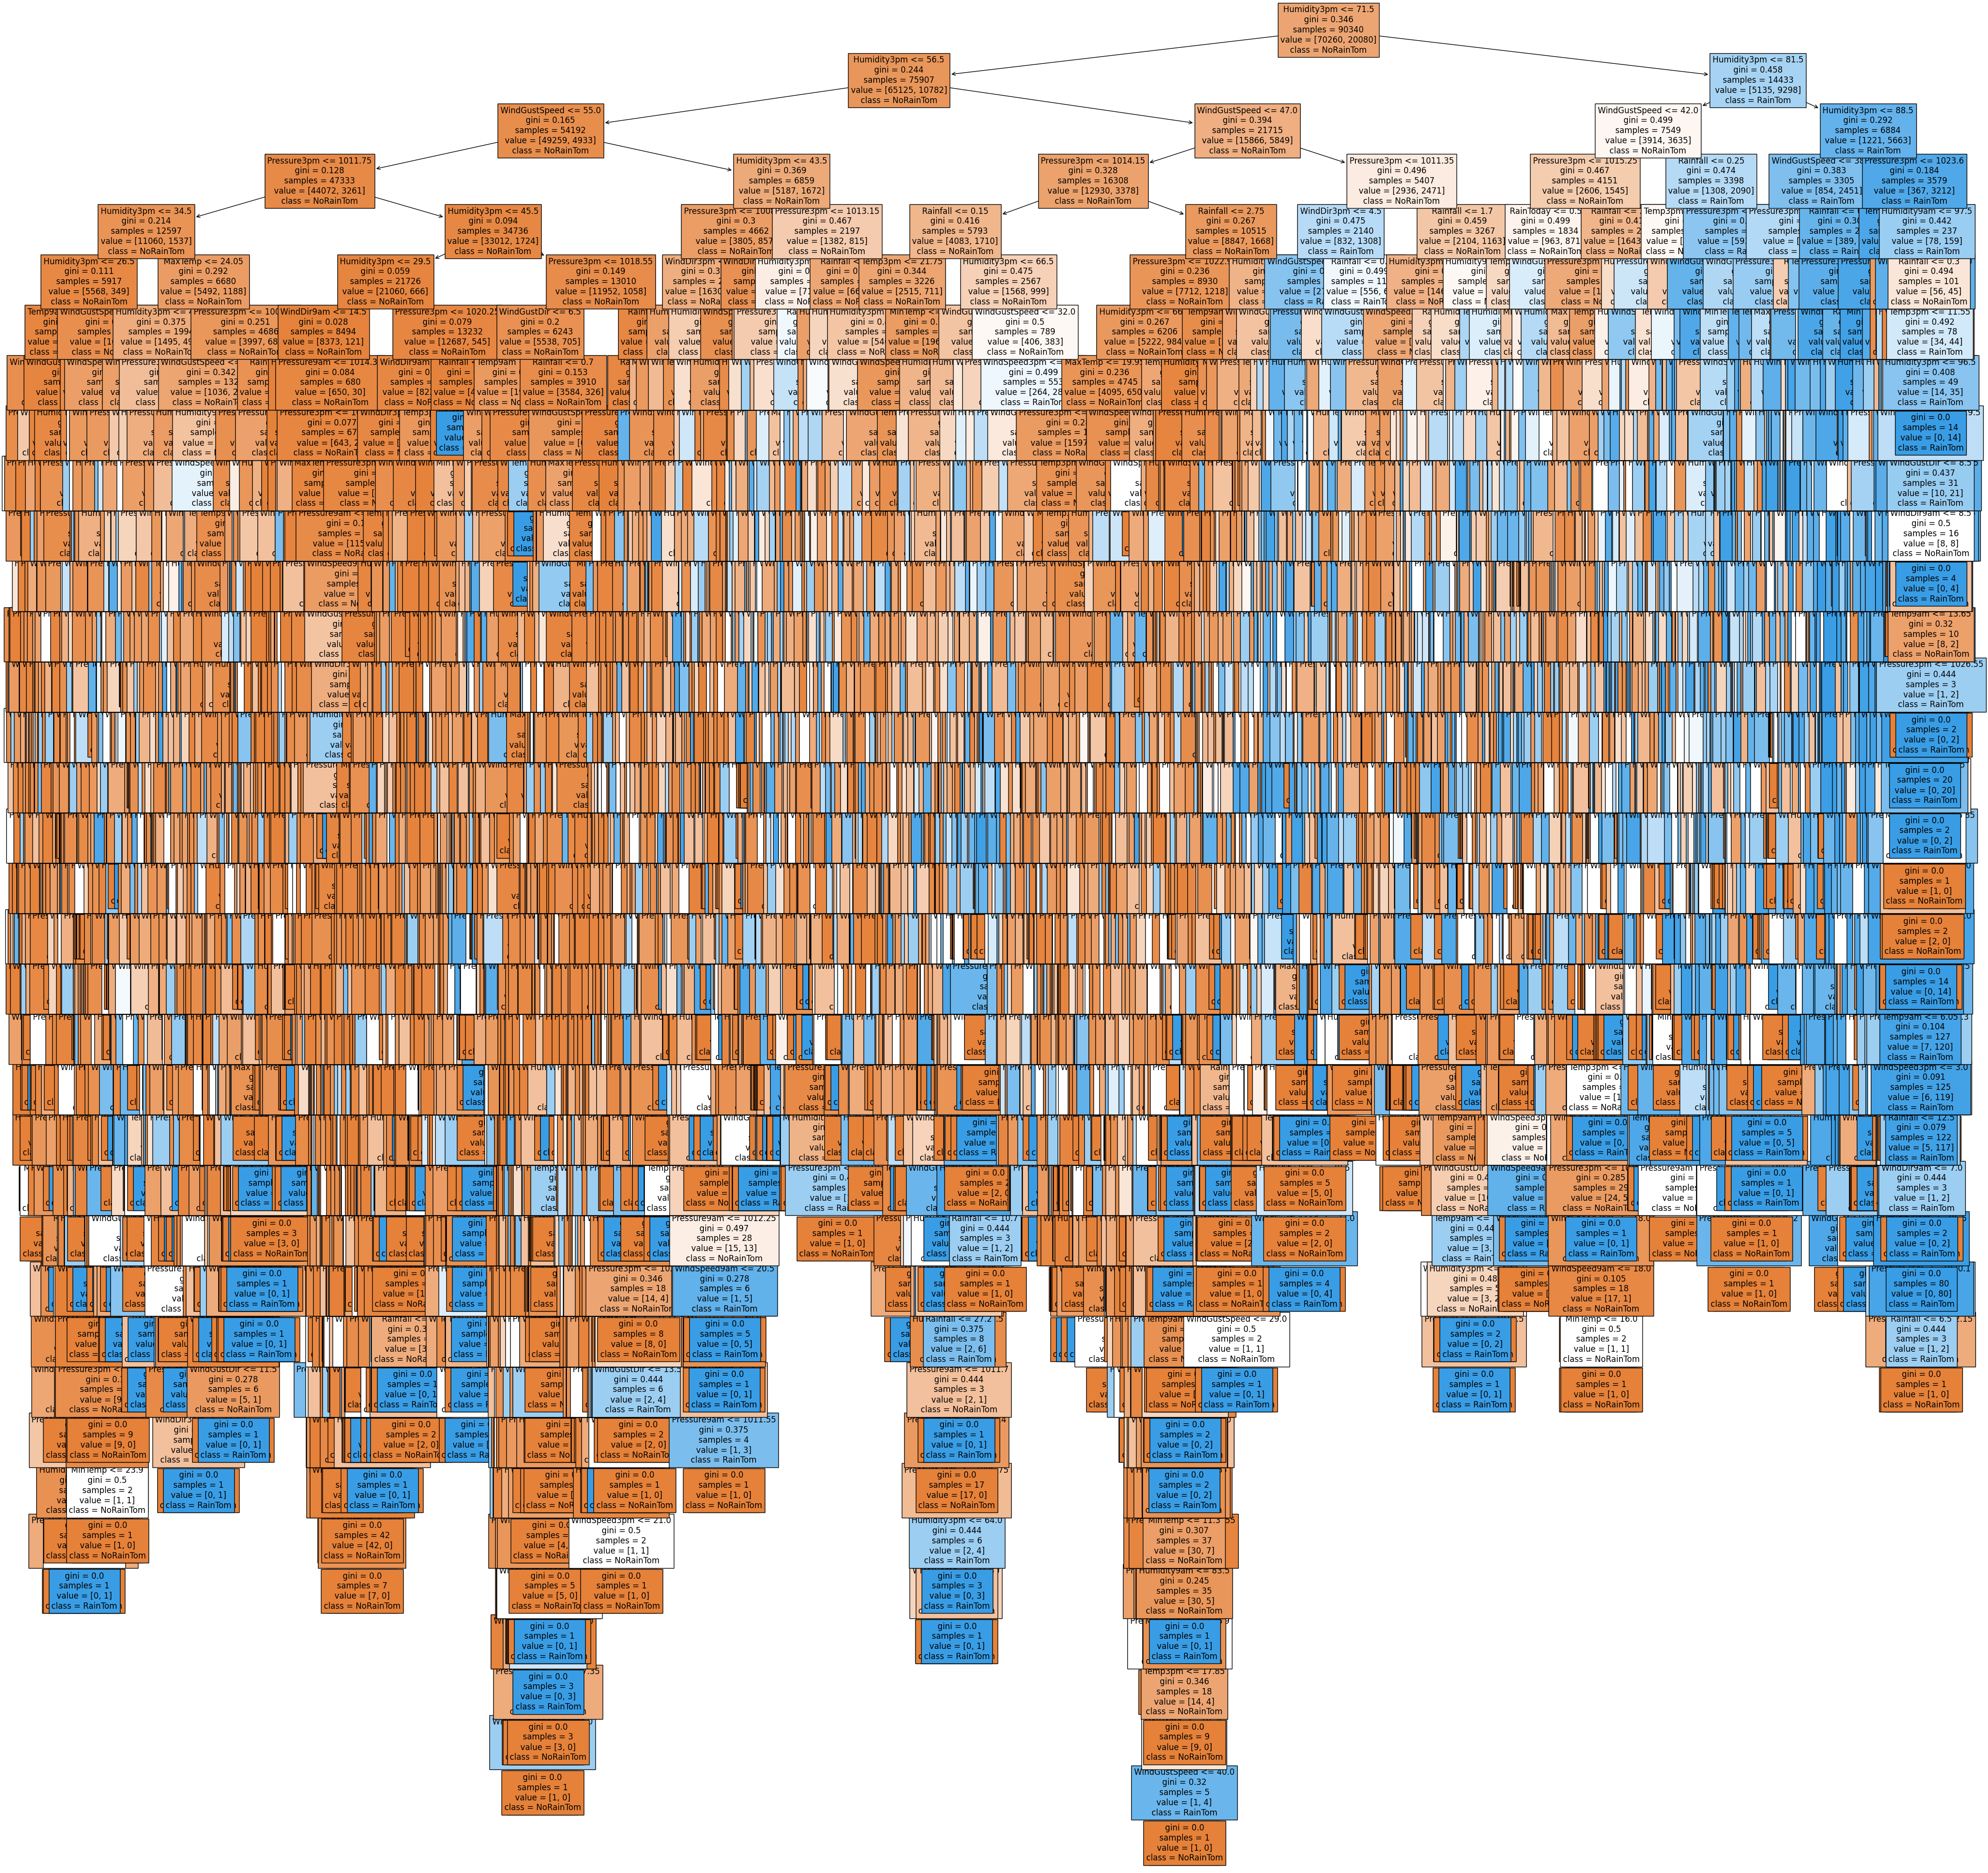

In [24]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names={0:'NoRainTom', 1:'RainTom'},
                   filled=True,
                  fontsize=12)

In [25]:
# follow the first example on the tree to explain the decision_path function output
X_test.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
130254,8.2,14.4,0.0,11,61.0,1,3,19.0,24.0,73.0,58.0,988.8,980.2,11.3,13.4,0
131114,11.5,23.6,0.0,13,39.0,3,6,7.0,26.0,74.0,60.0,1015.3,1012.4,17.5,21.0,0
139085,2.2,19.2,0.0,13,48.0,2,6,15.0,26.0,58.0,31.0,1029.2,1025.3,11.5,18.6,0
100342,13.1,18.8,1.0,12,37.0,5,11,17.0,22.0,75.0,61.0,1017.0,1016.6,14.6,18.3,0
18330,12.1,19.4,0.2,5,37.0,9,8,19.0,17.0,79.0,60.0,1021.4,1017.4,15.0,17.1,0


In [26]:
clf.decision_path(X_test)

<22585x21247 sparse matrix of type '<class 'numpy.int64'>'
	with 421833 stored elements in Compressed Sparse Row format>

In [27]:
sparse = clf.decision_path(X_test).toarray()[:101]

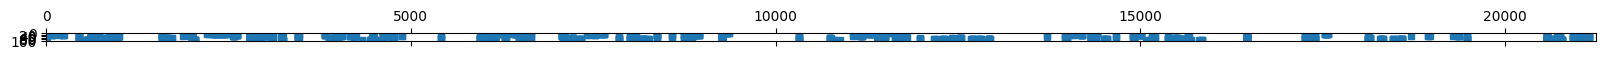

In [28]:
plt.figure(figsize=(20, 20))
plt.spy(sparse, markersize=5)